Il codice nella cella seguente **deve essere eseguito**, ma **non deve essere modificato**, perché essenziale per un'esecuzione senza errori del successivo codice del laboratorio. Dopo averlo eseguito, attendi che il pallino adiacente ad R in alto a destra diventi bianco o che scompaia il simbolo [*].

In [1]:
#Esegui ma non modificare. Attendi  che scompaia il simbolo [*] 
#o che il pallino adiacente ad R in alto a destra diventi bianco
#potrebbe essere necessario qualche minuto
source('lib/preamble.R')

## Generalizzazione PCA a più dimensioni
Il vero vantaggio della PCA si ha quando, come nel caso in esame, il data set contiene un alto numero di variabili correlate tra di loro. Il data set `GT` presenta molte variabili correlate tra loro, il che significa, ed è facile intuirlo, che non tutte le variabili aggiungono veramente nuove dimensioni al problema. 
Te ne accorgi già, ripetendo la scatter plot matrix, con la funzione `ggpairs()` del pacchetto `GGally`

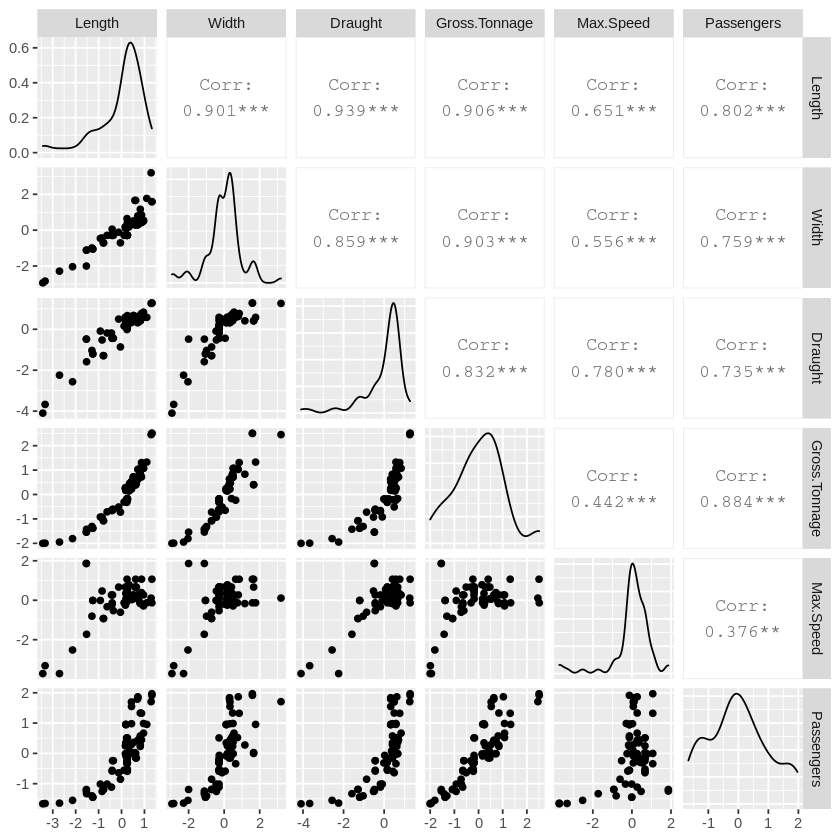

In [2]:
GTdataset_scaled %>% 
  ggpairs()

Tuttavia, alcune variabili presentano una dipendenza non propriamente lineare, che potremmo ignorare ai fini didattici. In questi casi, una tipica soluzione è l'uso della trasformazione logaritmica (in una base qualsiasi) del dataset. Il logaritmo in base $e$ si ottiene mediante la funzione `log()`. 
Ogni variabile (o solo quelle che presentano non linearità) vengono quindi sostituite dal proprio logaritmo, sempreché come nel nostro caso, le variabili assumano valori strettamente positivi. 
Fatto questo possiamo standardizzare il data set con la funzione `scale()`

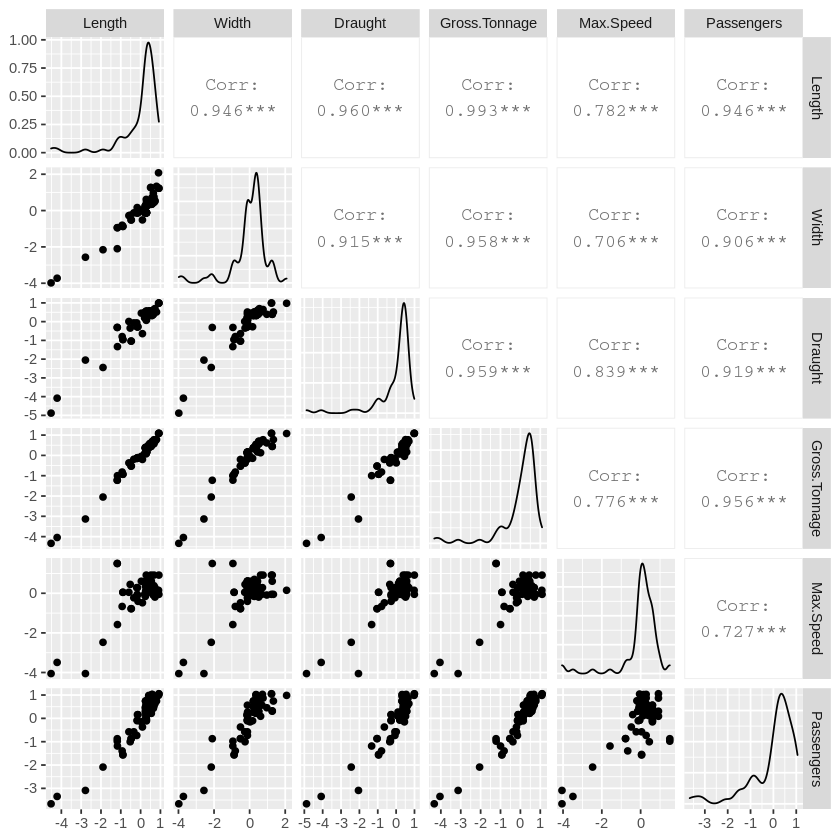

In [3]:
GT_log_scaled <- GTdataset %>% log() %>% scale() %>% as.data.frame()
GT_log_scaled %>% ggpairs()

Dalla scatter plot matrix, puoi osservare che la trasformazione ha avuto l'effetto sperato e ipotizzare che tutte le coppie di variabili del data set `GT_log_scaled` siano legate linearmente le une alle altre.
Tieni presente che la linearità tra le variabili è un'ipotesi auspicabile per poter catturare al meglio la variabilità di un dataset mediante i piani individuati dalle prime componenti principali, soprattutto quando, come in questo caso il numero di variabili/colonne non è molto alto. 
Puoi quindi effettuare la PCA, con lo stesso comando usato nei casi precedenti, che automaticamente generalizza il risultato al caso in cui le dimensioni del data set in esame siano $p>3$.

In [4]:
pr.out <- prcomp(GT_log_scaled)

## Qual è il numero di PC ottimale da considerare?
Per poter rispondere a questa domanda, osserva, prima di tutto, che per un qualsiasi data set standardizzato la varianza di ogni singola variabile è pari a 1. 
Pertanto la varianza totale del data set, definita come la somma delle varianze di ogni singola variabile, è pari a $p$, ossia nel nostro caso pari a 6.

In [5]:
apply(GT_log_scaled,2,var)

Length         Width       Draught Gross.Tonnage     Max.Speed 
            1             1             1             1             1 
   Passengers 
            1

Si può dimostrare che la varianza totale è invariante rispetto ai cambiamenti di sistema di riferimento e quindi sarà pari a $p=6$ anche la varianza totale degli score.

In [6]:
pr.out$sdev^2  %>% round(2)
sum(pr.out$sdev^2) %>% round(2)

[1] 5.44 0.37 0.09 0.05 0.04 0.01

[1] 6

La varianza totale può essere presa come riferimento del contenuto informativo del data set iniziale.
Tipicamente, per valutare il numero di PC ottimale si visualizza un diagramma che riporta la varianza di ogni score, ovvero il contenuto di `pr.out$sdev^2`, che puoi ottenere applicando direttamente la funzione `plot` ad un oggetto di tipo `prcomp`.

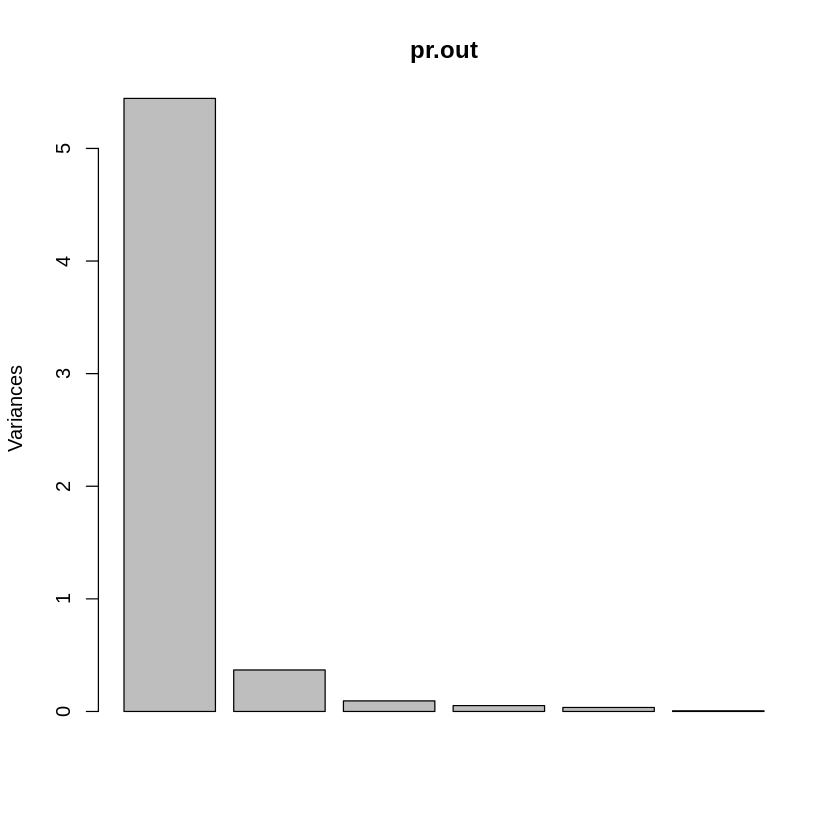

In [7]:
plot(pr.out) #plot di default

O creare un grafico analogo su scala $[0,1]$, ottenuto dividendo la varianza degli score per la varianza totale `pr.out$sdev^2/sum(pr.out$sdev^2)`. Questa quantità, per ogni PC, rappresenta la frazione di varianza spiegata (`fvs`). Questo grafico, chiamato *scree plot*, è a sinistra . In aggiunta, può essere utile visualizzare anche la frazione cumulata di varianza spiegata, riportata nel grafico a destra ottenuta attraverso la funzione `cumsum()`.

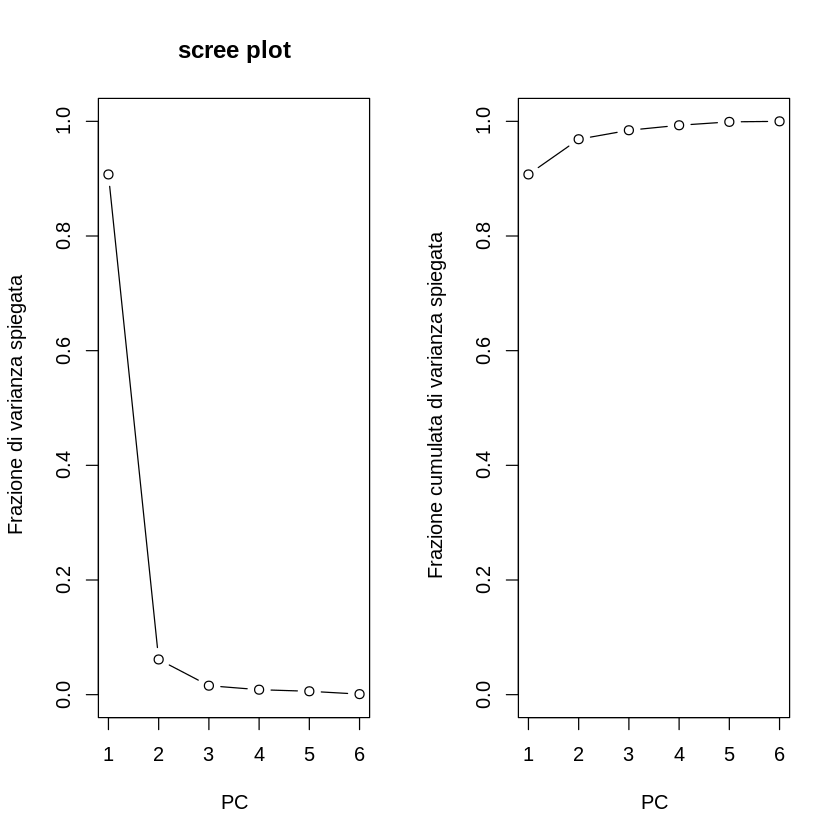

In [8]:
par(mfrow=c(1,2)) #per un pannello di grafici
fvs <-  pr.out$sdev^2/sum(pr.out$sdev^2)
plot(
     fvs,
    xlab = " PC ",
    ylab = " Frazione di varianza spiegata",
    main= "scree plot",
    ylim = c(0, 1) ,
    type = 'b') #scree plot

plot(
    cumsum(fvs) ,
    xlab = " PC ",
    ylab = " Frazione cumulata di varianza spiegata",
    ylim = c(0, 1) ,
    type = 'b') #scree plot

Il numero di PC ottimale sarà quindi ottenuto ragionevolmente come il numero di PC più basso a cui è associato una congrua frazione cumulata di varianza spiegata.
Per rendere operativo questo principio di carattere generale, tipicamente viene scelto, per parsimonia (concetto che illustreremo nelle prossime unità) il valore dell'ascissa in corrispondenza, o subito prima, del "gomito" dello scree plot. 
In alternativa, volendo fissare una regola più automatizzabile, puoi scegliere il numero di PC (più basso) che totalizzi una frazione di varianza maggiore di una soglia prefissata, tipicamente pari a 0.8, 0.9.
Nel caso del data set `GT`, il numero di PC da tenere in considerazione per una compressione soddisfacente del data set originale è pari a 2. Infatti, il gomito della `fvs` si configura proprio in corrispondenza della seconda PC e le prime due PC  spiegano il 97% della varianza totale.

In [9]:
sum(fvs[1:2]) %>% round(2)

[1] 0.97

Ovviamente, se il data set originale contenesse tutte variabili incorrelate (con un valore $R$ vicino allo 0) la PCA non avrebbe alcun vantaggio e non sarebbe possibile operare alcuna compressione del data set. Lo scree plot non avrebbe alcun gomito.

## Vantaggi della PCA
Tipicamente, la speranza di una soddisfacente PCA è che poche PC siano in grado di rappresentare tutto il contenuto informativo di data set con variabili molto correlate tra loro.
Comprimere un data set negli score delle sue prime PC ha sicuramente i seguenti vantaggi:

* ottimizzare la memoria occupata dal data set, 
* ridurre lo sforzo computazionale delle successive analisi.

Ma il vantaggio più grande, è rappresentato dalla possibilità di visualizzare il data set attraverso una sua proiezione su piani ottimali, in grado di catturare quasi tutta la variabilità totale. Tali piani sono quelli definiti dalle coppie di PC scelte. Tali visualizzazioni sono di vitale importanza per interpretare e acquisire conoscenza sul problema esaminato e non sarebbero in alcun modo possibili nel caso in cui il data set di partenza abbia un numero di colonne maggiore di 3. Nel caso del data set `GT` le $p=6$ variabili iniziali possono essere agevolmente visualizzate nel piano formato dalla PC1 e dalla PC2.


## Rappresentazione grafica delle PC
La rappresentazione grafica più usata in ambito PCA è il cosiddetto *biplot*,

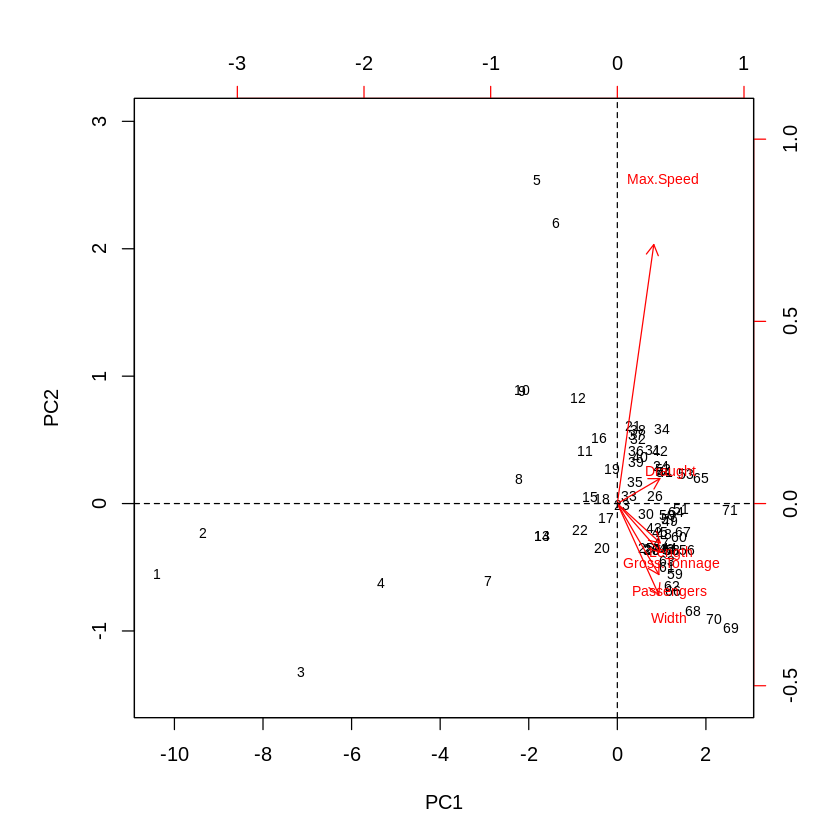

In [10]:
#bi-plot
par(mfrow = c(1, 1))
biplot(
  pr.out,
  scale = 0, 
  cex = .7,
  #xlim = c(-.1, 3),
  ylim = c(-1.5, 3)
)
abline(h = 0, v = 0, lty = 2)

che si ottiene come sovrapposizione di due grafici: quello dei loading (*loading plot*) (frecce in rosso) e quello degli score (*score plot*) (etichette nere).

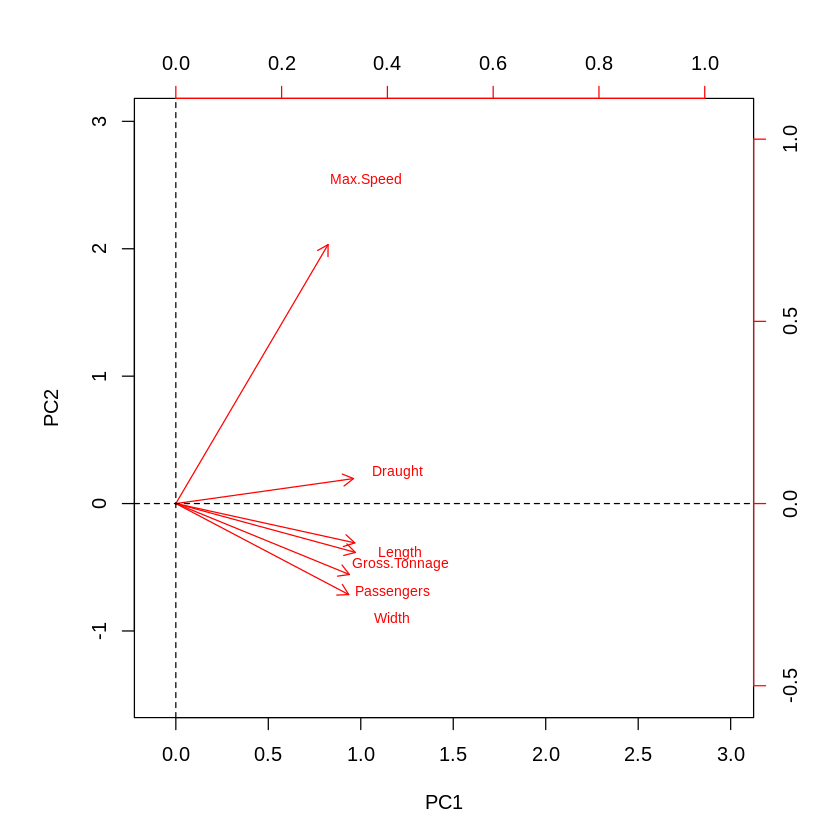

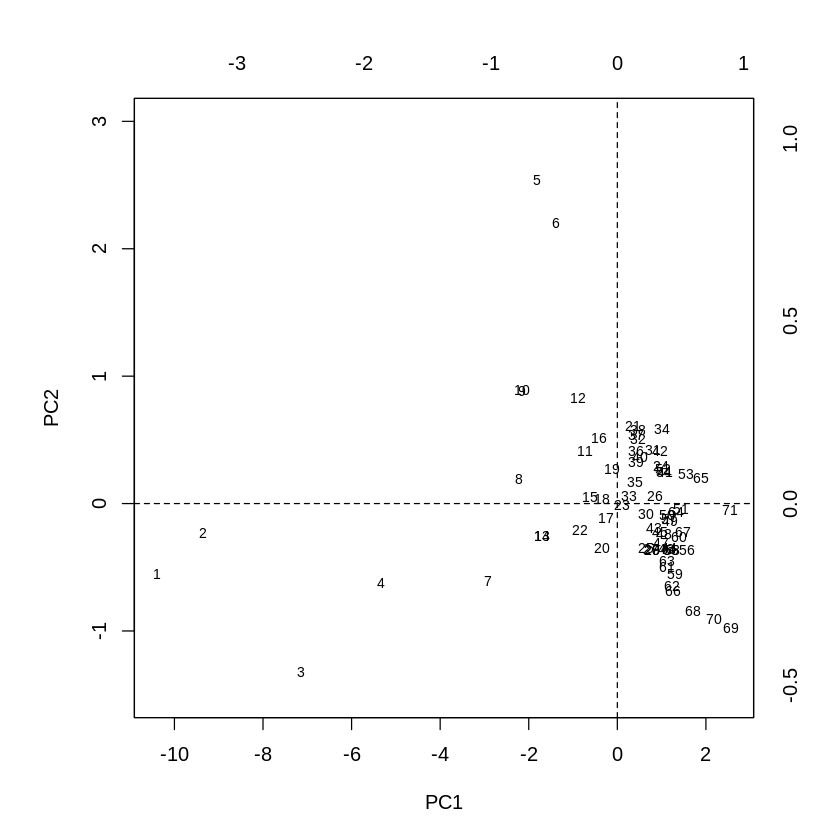

In [11]:
biplot(
  pr.out,
  scale = 0, 
  cex = .7,
  xlim = c(-.1, 3),
  ylim = c(-1.5, 3),
 col=c(alpha(1,0), "red")
 )
abline(h = 0, v = 0, lty = 2)

biplot(
  pr.out,
  scale = 0, 
  cex = .7,
 # xlim = c(-.1, 3),
  ylim = c(-1.5, 3),
 col=c("black", alpha(1,0))
 )
abline(h = 0, v = 0, lty = 2)

## Loading plot
Il loading plot riporta la rappresentazione delle righe della matrice `pr.out$rotation[,1:2]`, ossia la matrice contenente sulle prime due colonne i loading riferiti alla PC1 e alla PC2. La scala di riferimento è riportata sul lato destro e superiore del grafico.
Ricorda che la norma di ogni PC, ossia di ogni colonna di `pr.out$rotation`, per costruzione, è pari a 1. Viceversa, non è necessariamente così per la norma delle righe. Tuttavia si può affermare che gli elementi della matrice `pr.out$rotation`, e quindi in particolare quelli della sottomatrice `pr.out$rotation[,1:2]` possono raggiungere al massimo lunghezza unitaria, nel caso in cui una PC coincida esattamente con una variabile del data set originale.

In [12]:
pr.out$rotation[,1:2] %>% round(2)

,PC1,PC2
Length,0.42,-0.13
Width,0.41,-0.31
Draught,0.42,0.09
Gross.Tonnage,0.42,-0.17
Max.Speed,0.36,0.89
Passengers,0.41,-0.24


In tal modo, si riesce a visualizzare il legame multivariato tra le diverse variabili. 
Ogni freccia rappresenta i loading sulla PC1 e PC2 di ogni variabile del data set originale. 
Chiaramente, ogni freccia è solo una rappresentazione troncata alle prime due PC, ovvero una proiezione, della freccia completa, nello spazio a $p=6$ componenti. Tuttavia le componenti tralasciate, presenti nella parte mancante della matrice `pr.out$rotation`, riportata di seguito, non hanno, come già sappiamo dallo scree plot, un  peso rilevante sulla varianza totale. 

In [13]:
pr.out$rotation[,3:6] %>% round(2)

,PC3,PC4,PC5,PC6
Length,0.01,-0.25,-0.61,0.60
Width,0.66,0.45,0.28,0.11
Draught,0.03,-0.71,0.55,-0.02
Gross.Tonnage,0.02,-0.07,-0.41,-0.79
Max.Speed,0.03,0.28,-0.05,0.01
Passengers,-0.75,0.38,0.26,0.09


La lettura del loading plot è abbastanza intuitiva:

* frecce con una componente orizzontale maggiore di quella verticale rappresentano variabili che pesano più sulla PC1 che sulla PC2. Nel nostro caso, la variabile velocità massima `Max.Speed` è l'unica ad impattare sulla PC2 in modo sostanziale, rispetto a tutte le altre che invece sono sintetizzate dalla PC1. Pertanto, possiamo affermare che tale variabile è quella con un minor grado di dipendenza lineare dalle altre. Questa affermazione, come vedi è confermata dalla scatter plot matrix in cui la colonna `Max.Speed` ha i valori più bassi del coefficiente di correlazione campionaria.
* tutte le variabili, eccetto la `Max.Speed`, incidono praticamente sulla sola PC1, che quindi sintetizza le variabili dimensionali della nave/scafo: lunghezza, larghezza, pescaggio, che ragionevolmente incidono, a loro volta, sulla stazza ed il numero massimo di passeggeri. 
Inoltre, avendo tutte una componente concorde in segno (hanno tutte una componente positiva) sulla PC1, si può affermare che siano correlate positivamente tra loro.

## Score plot
Lo score plot è utile per visualizzare eventuali gruppi tra le osservazioni, etichettate per numero o nome della riga. Ogni punto sullo score plot rappresenta una riga di `pr.out$x[,1:2]`. La scala di riferimento è riportata sul lato sinistro e inferiore del grafico.
Dal momento che la varianza degli score è in generale maggiore per la PC1, in assenza di gruppi ci aspetteremmo una dispersione (intorno all'origine) lungo l'asse PC1 maggiore di quella lungo l'asse PC2.
Tuttavia, spesso accade che alcuni score si dispongano lontani dall'origine degli assi o comunque dalla maggioranza delle osservazioni (data cloud), o che formino una o più data cloud separate. Se si tratta di osservazioni singole, (come accade per le prime 7 righe del data set `GT`, nostro caso di esempio) parleremo di *outlier*, altrimenti di gruppi (*cluster*).
L'analisi dei gruppi (*clustering*) sarà oggetto della prossima unità.

## Biplot
La necessità di sovrapporre loading plot e score plot nasce dall'esigenza di identificare possibilmente le eventuali peculiarità mostrate dagli outlier e/o dai diversi gruppi, in termini di variabili del data set originale.
Osservando il biplot nel caso in esame, ci aspettiamo, per esempio, che le navi 5 e 6 abbiano un valore di velocità massima molto elevato rispetto al resto delle navi, mentre tutte le altre variabili risultano vicine alla media. Questa affermazione è possibile da un'analisi sovrapposta dei due grafici: 

* dallo score plot, le osservazioni 5 e 6 risultano outlier solo a causa della PC2. Entrambe hanno componente PC2 `pr.out$x[5:6,2]` positiva.

* dal loading plot, la PC2 è ben rappresentata dalla `Max.Speed`, che ha un loading positivo, concorde con la componente PC2 delle navi 5 e 6.

Per le stesse ragioni, le navi 1 e 2 ci aspettiamo che abbiano delle dimensioni dello scafo molto minori delle altre ma un valore di velocità massima non particolarmente elevato. Mentre lo score della nave 3 ha valori negativi sia per PC1 che per PC2. Quindi ci aspettiamo basse velocità e piccole dimensioni e/o numero di passeggeri. Meno estreme sono le navi 4,7, che comunque risultano di dimensioni ridotte e con valore più basso della media di `Max.Speed`. 

Ti dovrebbe quindi risultare chiaro che questa rappresentazione bidimensionale sia molto conveniente rispetto alla  scatter plot matrix ottenuta con `ggpairs`, in quanto basata su informazioni ottenute considerando tutte le variabili del data set originale in modo simultaneo, e non solo le dipendenze a coppie tra variabili.

## Approfondimento matematico

* Non confondere la lunghezza o norma di un vettore con la sua numerosità (numero di osservazioni) $n$, ossia `nrow(GTdataset)`! 
La funzione `norma()` può essere definita in $\textsf{R}$ nel modo seguente, come abbiamo visto nella lezione descrizione statistica di un set di dati.

In [14]:
norma <- function(x) sqrt(sum(x^2)) #definizione della funzione norma

* Il prodotto tra due colonne qualsiasi della matrice `pr.out$rotation` risulta nullo. Quindi si dice che le PC (intese come *direzione*, *loading*) sono tra loro perpendicolari per costruzione.   
Per convincertene, prova a modificare il seguente codice modificando i valori $i=1,\ldots, p$, $j=1,\ldots, p$ facendo attenzione a selezionare valori $i\neq j$. 
Ricorda che nel  caso in esame $p=6$.

In [15]:
i=2 #prova a cambiare i
j=3 #prova a cambiare j
pr.out$rotation[,i]%*%pr.out$rotation[,j]  %>%  as.numeric() %>% round() #prodotto tra colonne

[1] 0

* Se $i=j$ il codice precedente restituisce la norma al quadrato delle PC, che risulta unitaria, così come la norma delle PC

In [16]:
i=2 #prova a cambiare i
round(pr.out$rotation[,i]%*%pr.out$rotation[,i]) %>%  as.numeric #norma al quadrato 
norma(pr.out$rotation[,i]) #norma del vettore pr.out$rotation[,i]

[1] 1

[1] 1

* Anche gli score, che abbiamo già osservato avere media nulla, 

In [17]:
apply(as.matrix(pr.out$x),2, mean) %>% round()

PC1 PC2 PC3 PC4 PC5 PC6 
  0   0   0   0   0   0

sono perpendicolari tra loro $i\ne j$

In [18]:
i=2 #prova a cambiare i
j=3 #prova a cambiare j
round(pr.out$x[,i]%*%pr.out$x[,j])

0


Se $i=j$, otteniamo la norma degli score al quadrato

In [19]:
i=2 #prova a cambiare i
pr.out$x[,i]%*%pr.out$x[,i] %>%  as.numeric %>% round(2)
norma(pr.out$x[,i])^2 %>%  as.numeric %>% round(2)

[1] 25.79

[1] 25.79

+ Per quanto detto nell'approfondimento matematico, la norma degli score al quadrato, divisa per $n-1$, risulta invece pari alla varianza, già calcolata in `pr.out$sdev^2`.

In [20]:
(apply(as.matrix(pr.out$x),2, norma)^2/(n-1)) %>% round(2) #quindi risulta uguale alla sdev^2

PC1  PC2  PC3  PC4  PC5  PC6 
5.44 0.37 0.09 0.05 0.04 0.01

In [21]:
pr.out$sdev^2 %>% round(2) #ossia...

[1] 5.44 0.37 0.09 0.05 0.04 0.01

In [22]:
apply(as.matrix(pr.out$x),2, var) %>% round(2) #varianza delle colonne

PC1  PC2  PC3  PC4  PC5  PC6 
5.44 0.37 0.09 0.05 0.04 0.01